In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
laptop_data = pd.read_csv('C:/Download/laptop.csv')
laptop_data.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,CpuCompany,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,GPU,Ppi,Price
0,Apple,Ultrabook,8,macOS,1.37,0,Intel,2.3,0.000,0.0,0.0,0.128,Intel,312.781955,71378.6832
1,Apple,Ultrabook,8,macOS,1.34,0,Intel,1.8,0.128,0.0,0.0,0.000,Intel,175.939850,47895.5232
2,HP,Notebook,8,No,1.86,0,Intel,2.5,0.000,0.0,0.0,0.256,Intel,192.307692,30636.0000
3,Apple,Ultrabook,16,macOS,1.83,0,Intel,2.7,0.000,0.0,0.0,0.512,AMD,303.896104,135195.3360
4,Apple,Ultrabook,8,macOS,1.37,0,Intel,3.1,0.000,0.0,0.0,0.256,Intel,312.781955,96095.8080


In [2]:
# 데이터의 기본적인 통계 및 정보 확인
data_info = laptop_data.describe(include='all')
data_info

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,CpuCompany,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,GPU,Ppi,Price
count,1303,1303,1303.000000,1303,1303.000000,1303.000000,1303,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303,1303.000000,1303.000000
unique,19,6,NaN,7,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,Dell,Notebook,NaN,Windows,NaN,NaN,Intel,NaN,NaN,NaN,NaN,NaN,Intel,NaN,NaN
freq,297,727,NaN,1125,NaN,NaN,1240,NaN,NaN,NaN,NaN,NaN,722,NaN,NaN
mean,NaN,NaN,8.382195,NaN,2.038734,0.147352,NaN,2.298772,0.004556,0.413784,0.008832,0.183733,NaN,199.810137,59870.042910
std,NaN,NaN,5.084665,NaN,0.665475,0.354593,NaN,0.506340,0.030274,0.515819,0.092567,0.186967,NaN,58.918643,37243.201786
min,NaN,NaN,2.000000,NaN,0.690000,0.000000,NaN,0.900000,0.000000,0.000000,0.000000,0.000000,NaN,123.352601,9270.720000
25%,NaN,NaN,4.000000,NaN,1.500000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,173.410405,31914.720000
50%,NaN,NaN,8.000000,NaN,2.040000,0.000000,NaN,2.500000,0.000000,0.000000,0.000000,0.256000,NaN,192.307692,52054.560000
75%,NaN,NaN,8.000000,NaN,2.300000,0.000000,NaN,2.700000,0.000000,1.000000,0.000000,0.256000,NaN,214.285714,79274.246400


In [3]:
# 필요한 라이브러리 임포트
import pandas as pd

# 누락된 데이터 확인
missing_data = laptop_data.isnull().sum()
print(missing_data)

# 중복된 데이터 확인
duplicate_rows = laptop_data.duplicated().sum()
print("duplicate_rows : ", duplicate_rows)

Company          0
TypeName         0
Ram              0
OpSys            0
Weight           0
Touchscreen      0
CpuCompany       0
ClockSpeed       0
Flash Storage    0
HDD              0
Hybrid           0
SSD              0
GPU              0
Ppi              0
Price            0
dtype: int64
duplicate_rows :  30


In [4]:
# 중복된 행 제거
laptop_data_cleaned = laptop_data.drop_duplicates()

# 중복 행 제거 후 데이터의 행 수 확인
remaining_rows = laptop_data_cleaned.shape[0]
print("remaining_rows  : ", remaining_rows)

remaining_rows  :  1273


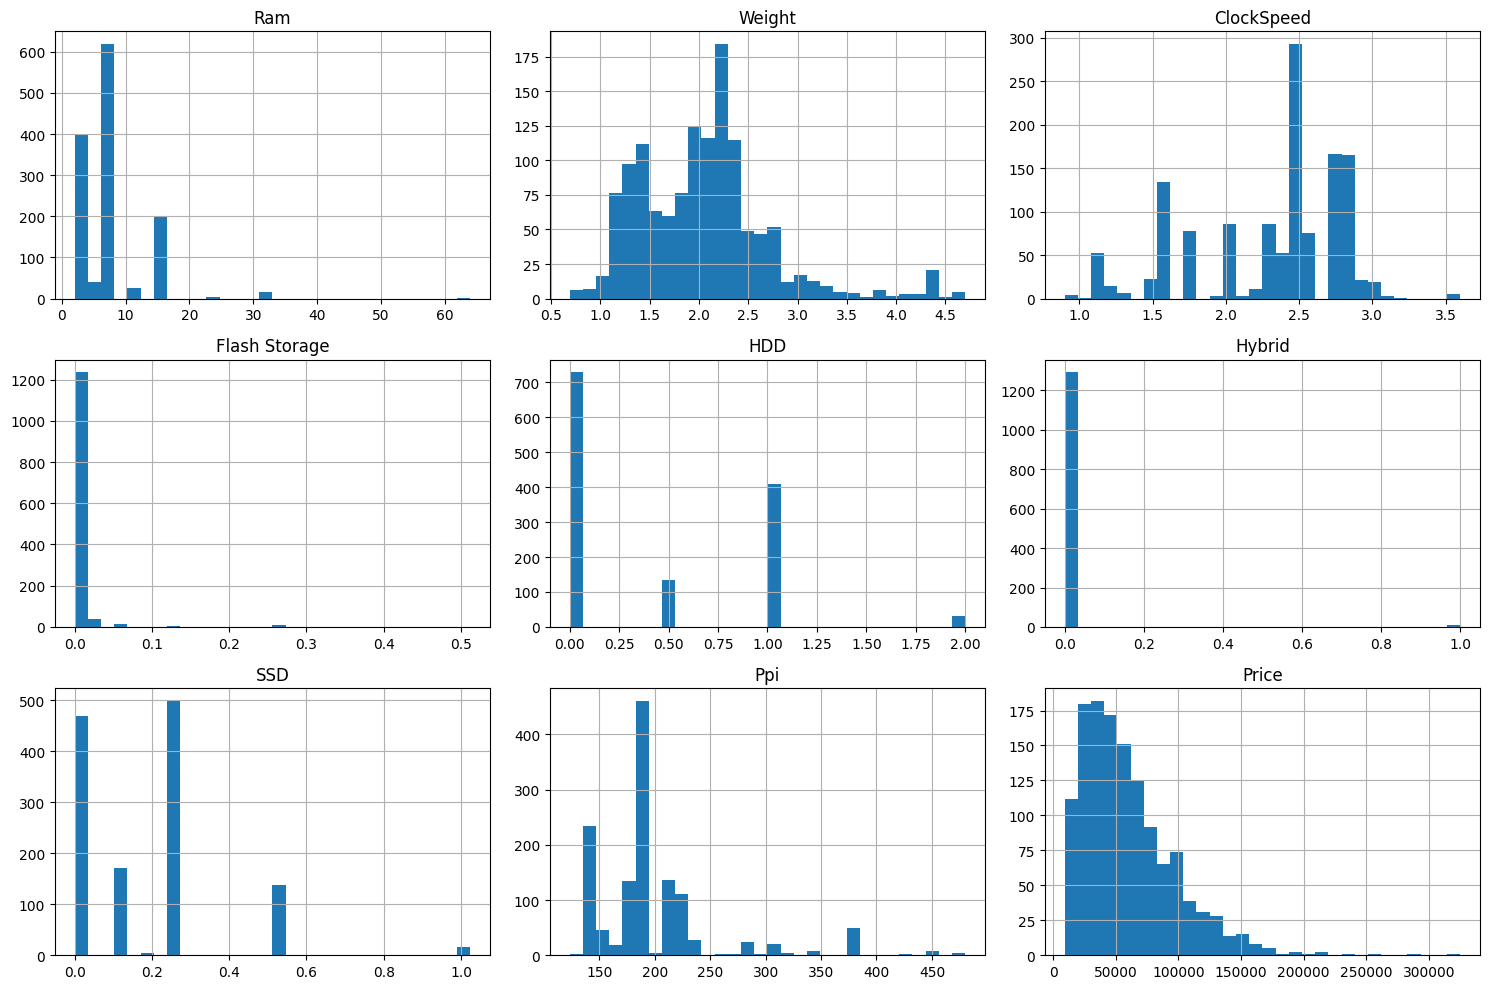

In [5]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 특성들의 분포를 보기 위한 히스토그램
numeric_features = ["Ram", "Weight", "ClockSpeed", "Flash Storage", "HDD", "Hybrid", "SSD", "Ppi", "Price"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    laptop_data[feature].hist(bins=30)  # 각 특성의 히스토그램 그리기
    plt.title(feature)
    plt.tight_layout()
plt.show()

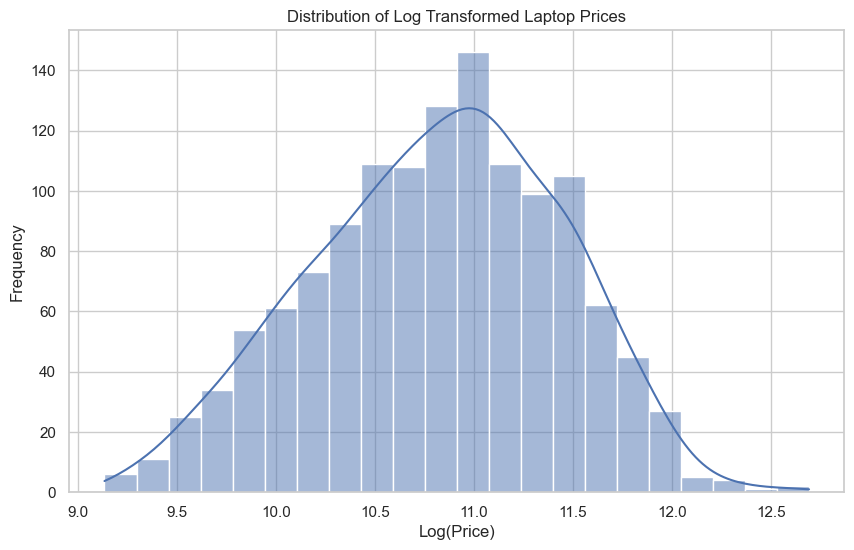

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation to the Price column
laptop_data['Log_Price'] = np.log1p(laptop_data['Price'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw a distribution plot for the log-transformed Price
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data['Log_Price'], kde=True)
plt.title('Distribution of Log Transformed Laptop Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


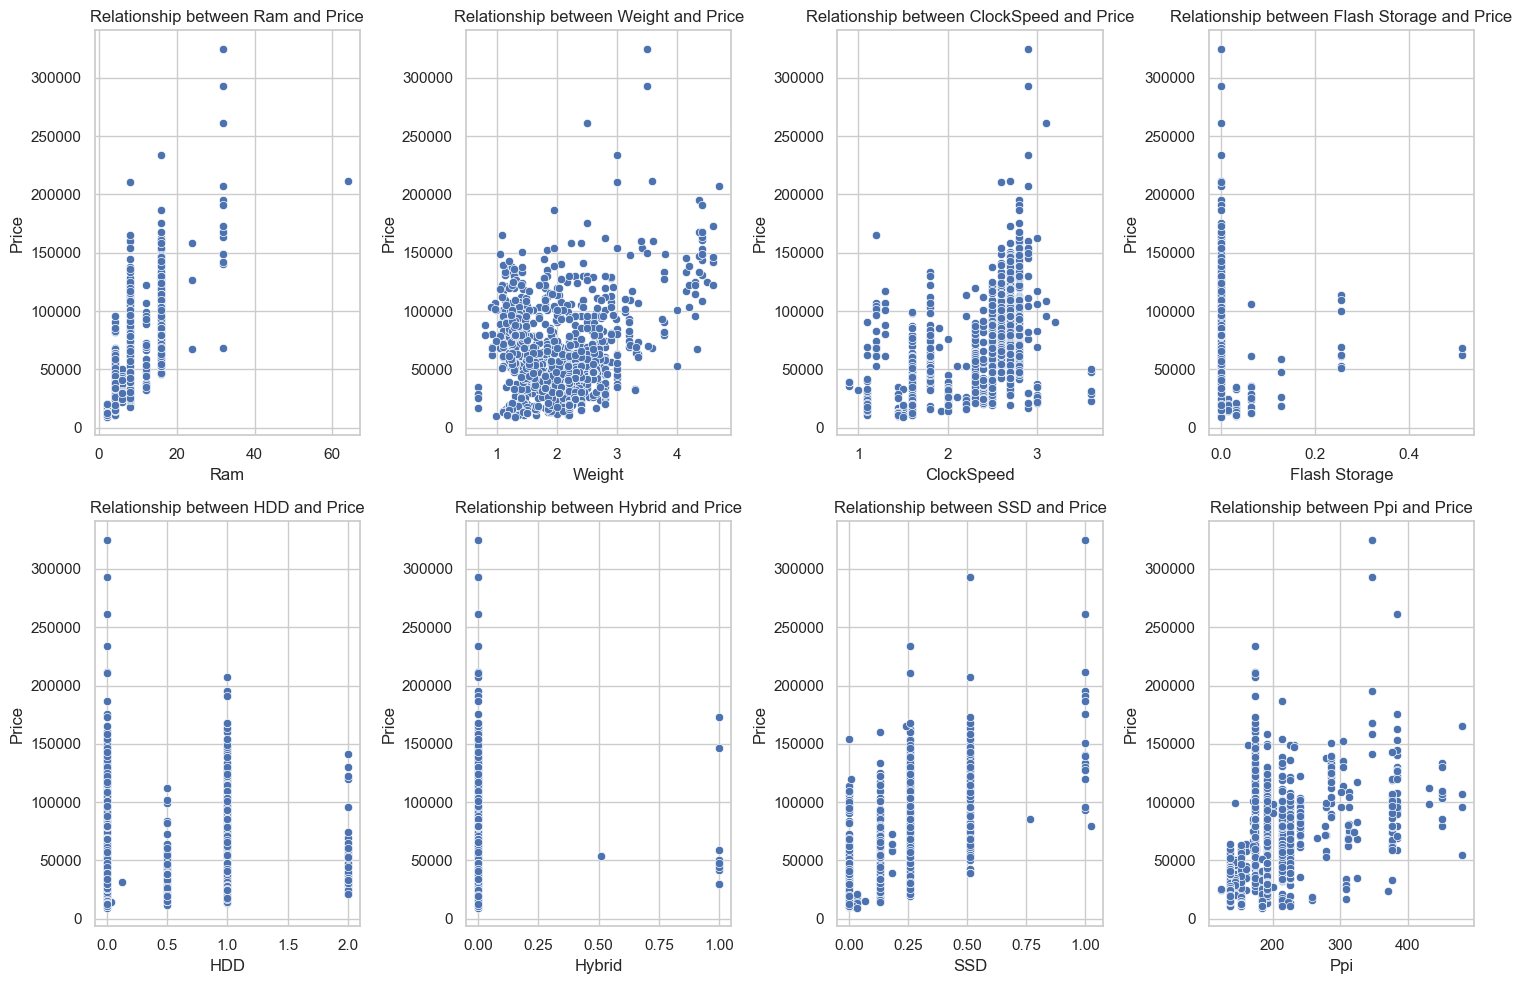

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to be plotted
features = ['Ram', 'Weight', 'ClockSpeed', 'Flash Storage', 'HDD', 'Hybrid', 'SSD', 'Ppi']

plt.figure(figsize=(15, 10))

# Plotting scatter plots for each feature against Price
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=laptop_data, x=feature, y='Price')
    plt.title(f'Relationship between {feature} and Price')

plt.tight_layout()
plt.show()


In [11]:
# Features to drop
drop_features = ['OpSys', 'TypeName', 'GPU', 'Ppi', 'CpuCompany', 'Touchscreen', 'ClockSpeed', 'Weight', 'HDD', 'Hybrid', 'Flash Storage']

# Dropping the specified features
laptop_data_reduced = laptop_data.drop(columns=drop_features)
laptop_data_reduced.head()

,Company,Ram,SSD,Price,Log_Price
0,Apple,8,0.128,71378.6832,11.175769
1,Apple,8,0.000,47895.5232,10.776798
2,HP,8,0.256,30636.0000,10.329964
3,Apple,16,0.512,135195.3360,11.814483
4,Apple,8,0.256,96095.8080,11.473111


In [14]:
laptop_data_encoded = pd.get_dummies(laptop_data_reduced, columns=['Company'])

laptop_data_encoded.head()

,Ram,SSD,Price,Log_Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,8,0.128,71378.6832,11.175769,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0.000,47895.5232,10.776798,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0.256,30636.0000,10.329964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0.512,135195.3360,11.814483,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0.256,96095.8080,11.473111,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Splitting the data into features and target
X = laptop_data_reduced.drop(columns='Price')
y = laptop_data_reduced['Price']

# Define the numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Company']

# Create the numeric transformer with two steps: imputation and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create the categorical transformer with two steps: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline by combining the preprocessor with a linear regression estimator
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())
                          ])

# Return the constructed pipeline
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'SSD', 'Log_Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company'])])),
                ('regressor', LinearRegression())])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the training set and test set
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

# Step 4: Evaluate the model performance
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2


(11556.332498375437,
 13415.875780394097,
 8390.837402462252,
 8736.116841204566,
 0.9026388572970908,
 0.8751729429783682)

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Create the final pipeline by combining the preprocessor with a random forest regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))
                             ])

# Fit the random forest model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions on the training set and test set
rf_train_preds = rf_pipeline.predict(X_train)
rf_test_preds = rf_pipeline.predict(X_test)

# Evaluate the model performance
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

rf_train_rmse, rf_test_rmse, rf_train_mae, rf_test_mae, rf_train_r2, rf_test_r2


(1073.3714955325008,
 4206.342089223951,
 92.64894992706418,
 416.64204689654963,
 0.9991600649186758,
 0.9877290028853073)

In [19]:
import numpy as np

# 1. Apply log transformation to y_train and y_test
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 2. Train the random forest model using the pipeline
rf_pipeline.fit(X_train, y_train_log)

# 3. Get predictions from the model
rf_train_log_preds = rf_pipeline.predict(X_train)
rf_test_log_preds = rf_pipeline.predict(X_test)

# 4. Apply inverse log transformation to the predictions
rf_train_preds_inverse = np.expm1(rf_train_log_preds)
rf_test_preds_inverse = np.expm1(rf_test_log_preds)

# 5. Evaluate the model performance on original scale
rf_train_rmse_log = np.sqrt(mean_squared_error(y_train, rf_train_preds_inverse))
rf_test_rmse_log = np.sqrt(mean_squared_error(y_test, rf_test_preds_inverse))

rf_train_mae_log = mean_absolute_error(y_train, rf_train_preds_inverse)
rf_test_mae_log = mean_absolute_error(y_test, rf_test_preds_inverse)

rf_train_r2_log = r2_score(y_train, rf_train_preds_inverse)
rf_test_r2_log = r2_score(y_test, rf_test_preds_inverse)

rf_train_rmse_log, rf_test_rmse_log, rf_train_mae_log, rf_test_mae_log, rf_train_r2_log, rf_test_r2_log


(1105.8465730655614,
 4538.012135590099,
 93.39498673540172,
 435.83097239285473,
 0.9991084712402485,
 0.9857175740661388)

In [20]:
from sklearn.model_selection import GridSearchCV

# 1. Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 2. Create a GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# 3. Run grid search
grid_search.fit(X_train, y_train_log)

# 4. Check the best hyperparameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'regressor__max_depth': None,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 50}

In [21]:
# Create a new random forest regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(
    n_estimators=best_params['regressor__n_estimators'],
    max_depth=best_params['regressor__max_depth'],
    min_samples_split=best_params['regressor__min_samples_split'],
    min_samples_leaf=best_params['regressor__min_samples_leaf'],
    random_state=42
)

# Create a new pipeline with the best random forest regressor
best_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', best_rf_regressor)
                                  ])

# Fit the best random forest model using the pipeline
best_rf_pipeline.fit(X_train, y_train_log)

# Get predictions from the best model
best_rf_train_log_preds = best_rf_pipeline.predict(X_train)
best_rf_test_log_preds = best_rf_pipeline.predict(X_test)

# Apply inverse log transformation to the predictions
best_rf_train_preds_inverse = np.expm1(best_rf_train_log_preds)
best_rf_test_preds_inverse = np.expm1(best_rf_test_log_preds)

# Evaluate the model performance on original scale
best_rf_train_rmse = np.sqrt(mean_squared_error(y_train, best_rf_train_preds_inverse))
best_rf_test_rmse = np.sqrt(mean_squared_error(y_test, best_rf_test_preds_inverse))

best_rf_train_mae = mean_absolute_error(y_train, best_rf_train_preds_inverse)
best_rf_test_mae = mean_absolute_error(y_test, best_rf_test_preds_inverse)

best_rf_train_r2 = r2_score(y_train, best_rf_train_preds_inverse)
best_rf_test_r2 = r2_score(y_test, best_rf_test_preds_inverse)

best_rf_train_rmse, best_rf_test_rmse, best_rf_train_mae, best_rf_test_mae, best_rf_train_r2, best_rf_test_r2


(1136.8971817056083,
 4586.593228660412,
 95.5779705095611,
 435.63967369136606,
 0.9990577026179491,
 0.9854101399588064)